### Try-it 8.1: The "Best" Model

This module was all about regression and using Python's scikitlearn library to build regression models.  Below, a dataset related to real estate prices in California is given. While many of the assignments you have built and evaluated different models, it is important to spend some time interpreting the resulting "best" model.  


Your goal is to build a regression model to predict the price of a house in California.  After doing so, you are to *interpret* the model.  There are many strategies for doing so, including some built in methods from scikitlearn.  One example is `permutation_importance`.  Permutation feature importance is a strategy for inspecting a model and its features importance.  

Take a look at the user guide for `permutation_importance` [here](https://scikit-learn.org/stable/modules/permutation_importance.html).  Use  the `sklearn.inspection` modules implementation of `permutation_importance` to investigate the importance of different features to your regression models.  Share these results on the discussion board.

In [ ]:
import pandas as pd
from sklearn.inspection import permutation_importance
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
cali = pd.read_csv('/content/drive/MyDrive/Data Sci Course/Module8/housing.csv')

In [ ]:
cali.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
cali.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
cali.describe()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


DATA CLEANING

In [ ]:
#Identify duplicate data
cali.duplicated().value_counts()

False    20640
Name: count, dtype: int64

In [ ]:
#Identify missing data
cali.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [ ]:
#Drop missing data
cali_nona=cali.dropna()
cali_nona.shape

(20433, 10)

In [ ]:
#Describe categorical features
print(cali_nona['ocean_proximity'].value_counts())


ocean_proximity
<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: count, dtype: int64


In [ ]:
#Create dummies for categorical feature and add to dataframe
dummies=pd.get_dummies(cali_nona['ocean_proximity'], dtype=int)
cali_dummies=pd.concat([cali_nona, dummies], axis=1)
cali_dummies.shape

(20433, 15)

In [ ]:
#Drop features that don't add information
cali_final=cali_dummies.drop(columns=['longitude', 'latitude', 'ocean_proximity'])
cali_final.shape

(20433, 12)

In [ ]:
cali_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   housing_median_age  20433 non-null  float64
 1   total_rooms         20433 non-null  float64
 2   total_bedrooms      20433 non-null  float64
 3   population          20433 non-null  float64
 4   households          20433 non-null  float64
 5   median_income       20433 non-null  float64
 6   median_house_value  20433 non-null  float64
 7   <1H OCEAN           20433 non-null  int64  
 8   INLAND              20433 non-null  int64  
 9   ISLAND              20433 non-null  int64  
 10  NEAR BAY            20433 non-null  int64  
 11  NEAR OCEAN          20433 non-null  int64  
dtypes: float64(7), int64(5)
memory usage: 2.5 MB


PREP FOR MODELING

In [ ]:
#Define predictor and target features
X = cali_final.drop('median_house_value', axis=1)
y = cali_final['median_house_value']
X.shape

(20433, 11)

In [ ]:
#Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(type(X_train), type(y_train))#



(14303, 11)
(6130, 11)
(14303,)
(6130,)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


LINEAR REGRESSION

In [ ]:
#Simple linear regression model
model_1 = X_train[['median_income']]
lr = LinearRegression().fit(X_age, y_train)
model_1_train_mse = mean_squared_error(y_train, lr.predict(X_age))
model_1_test_mse = mean_squared_error(y_test, lr.predict(X_test[['median_income']]))

# Answer check
print(f'Train MSE: {model_1_train_mse: .2f}')
print(f'Test MSE: {model_1_test_mse: .2f}')


Train MSE:  7023243339.41
Test MSE:  6982859996.24


In [ ]:
#Pipeline to test 2-degree polynomial features
pipe = Pipeline([('polynomial', PolynomialFeatures(degree=2)),('linreg', LinearRegression())])
pipe



Pipeline(steps=[('polynomial', PolynomialFeatures()),
                ('linreg', LinearRegression())])

In [ ]:
#Fit the model, predict values for X in training and test sets and calculate MSEs
pipe.fit(X_train, y_train)

train_preds = pipe.predict(X_train)
test_preds = pipe.predict(X_test)
train_mse = mean_squared_error(y_train, train_preds)
test_mse = mean_squared_error(y_test, test_preds)

# Answer check
print(f'Train MSE: {train_mse: .2f}')
print(f'Test MSE: {test_mse: .2f}')

Train MSE:  4258777052.05
Test MSE:  4307041966.08


In [ ]:
# Calculate the permutation importance
results = permutation_importance(pipe, X_test, y_test)
importances = pd.DataFrame(data=results.importances_mean, index=X.columns, columns=['Importance']).sort_values(by='Importance', ascending=False)
print(importances)

                    Importance
total_bedrooms        4.606672
total_rooms           1.790709
median_income         1.067253
population            0.783304
INLAND                0.514764
<1H OCEAN             0.508990
households            0.401991
NEAR OCEAN            0.232823
NEAR BAY              0.149026
housing_median_age    0.076916
ISLAND                0.006539


In [ ]:
#Pipeline with standardization to test 2-degree polynomial features
pipe2 = Pipeline([('scaler', StandardScaler()), ('polynomial', PolynomialFeatures(degree=2)),('linreg', LinearRegression())])
pipe2

Pipeline(steps=[('scaler', StandardScaler()),
                ('polynomial', PolynomialFeatures()),
                ('linreg', LinearRegression())])

In [ ]:
#Fit the model, predict values for X in training and test sets and calculate MSEs
pipe2.fit(X_train, y_train)

train2_preds = pipe2.predict(X_train)
test2_preds = pipe2.predict(X_test)
train2_mse = mean_squared_error(y_train, train2_preds)
test2_mse = mean_squared_error(y_test, test2_preds)

# Answer check
print(f'Train2 MSE: {train2_mse: .2f}')
print(f'Test2 MSE: {test2_mse: .2f}')

Train2 MSE:  4258777052.07
Test2 MSE:  2659223205445263872.00


In [ ]:
# Calculate the permutation importance
results2 = permutation_importance(pipe2, X_test, y_test)
importances = pd.DataFrame(data=results2.importances_mean, index=X.columns, columns=['Importance']).sort_values(by='Importance', ascending=False)
print(importances)

                      Importance
INLAND              3.935760e+11
NEAR OCEAN          3.199574e+11
NEAR BAY            2.382421e+11
<1H OCEAN           1.210444e+11
ISLAND              6.577825e+08
median_income       6.406486e+07
population          1.898907e+07
housing_median_age  6.326208e+06
households          6.846241e+05
total_rooms        -4.926128e+05
total_bedrooms     -9.711841e+05


In [ ]:
#Pipeline with standardization to test 2-degree polynomial features
pipe25 = Pipeline([('polynomial', PolynomialFeatures(degree=2, include_bias=False)),('linreg', LinearRegression())])
pipe25.fit(X_train, y_train)

train25_preds = pipe25.predict(X_train)
test25_preds = pipe25.predict(X_test)
train25_mse = mean_squared_error(y_train, train25_preds)
test25_mse = mean_squared_error(y_test, test25_preds)

# Answer check
print(f'Train25 MSE: {train25_mse: .2f}')
print(f'Test25 MSE: {test25_mse: .2f}')

Train25 MSE:  4258777110.98
Test25 MSE:  275971220859900000.00


In [ ]:
#Repeat Model1 to test 3-degree polynomial features

pipe3 = Pipeline([('polynomial', PolynomialFeatures(degree=3)),('linreg', LinearRegression())])

#Fit the model, predict values for X in training and test sets and calculate MSEs
pipe3.fit(X_train, y_train)

train3_preds = pipe3.predict(X_train)
test3_preds = pipe3.predict(X_test)
train3_mse = mean_squared_error(y_train, train3_preds)
test3_mse = mean_squared_error(y_test, test3_preds)

# Answer check
print(f'Train3 MSE: {train3_mse: .2f}')
print(f'Test3 MSE: {test3_mse: .2f}')

Train3 MSE:  3596680091.40
Test3 MSE:  3960758164.79


In [ ]:
# Calculate the permutation importance
results3 = permutation_importance(pipe3, X_test, y_test)
importances = pd.DataFrame(data=results3.importances_mean, index=X.columns, columns=['Importance']).sort_values(by='Importance', ascending=False)
print(importances)

                     Importance
households          1441.342940
total_bedrooms       126.525155
total_rooms          108.391549
<1H OCEAN             23.008768
INLAND                21.084070
NEAR BAY               8.555629
population             7.051967
NEAR OCEAN             6.866666
median_income          1.170005
housing_median_age     0.106709
ISLAND                 0.031657


In [ ]:
#Repeat Model2 to test 3-degree polynomial features with a standardization step

pipe4 = Pipeline([('scaler', StandardScaler()),('polynomial', PolynomialFeatures(degree=3)),('linreg', LinearRegression())])

#Fit the model, predict values for X in training and test sets and calculate MSEs
pipe4.fit(X_train, y_train)

train4_preds = pipe4.predict(X_train)
test4_preds = pipe4.predict(X_test)
train4_mse = mean_squared_error(y_train, train4_preds)
test4_mse = mean_squared_error(y_test, test4_preds)

# Answer check
print(f'Train4 MSE: {train4_mse: .2f}')
print(f'Test4 MSE: {test4_mse: .2f}')

Train4 MSE:  3596680063.11
Test4 MSE:  3856776377.56


In [ ]:
results4 = permutation_importance(pipe4, X_test, y_test)
importances = pd.DataFrame(data=results4.importances_mean, index=X.columns, columns=['Importance']).sort_values(by='Importance', ascending=False)
print(importances)

                     Importance
households          1322.942098
total_bedrooms       109.759509
total_rooms           96.512935
population             5.792965
median_income          1.174219
INLAND                 0.184017
<1H OCEAN              0.131273
NEAR OCEAN             0.109794
housing_median_age     0.104210
NEAR BAY               0.072478
ISLAND                 0.001781


RESULTS SUMMARY

The results were interesting, as shown in the table below. The MSE was lowest for the 3-degree model with the standardized features. The top three features were consistent in both 3-degree models, with households as the most important by a large margin. I interpret this to mean that density is the most important predictor of house price. For example, a 600 sf condo in central San Francisco can cost a lot more than a 3,000 sf house in rural Central Valley areas.

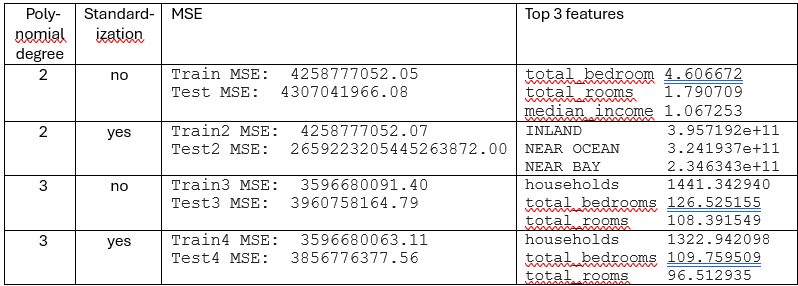